In [49]:
toyo = pd.read_csv('ToyotaCorolla - MLR.csv')
toyo

<IPython.core.display.Javascript object>

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [50]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [53]:
#Applying Label Encoding on 'Fuel_Type' feature
toyo['Fuel_Type'] = LabelEncoder().fit_transform(toyo['Fuel_Type'])

#Applying One-Hot Encoding on the categorical feature 'Fuel_Type'
Fuel_Type = pd.get_dummies(toyo['Fuel_Type'], drop_first=True, dtype=int)

#New Encoded Columns
Fuel_Type

#Deleting the original column 'Fuel_Type' from the dataset
toyo.pop('Fuel_Type')

#Inserting the new Encoded Columns
toyo.insert(3, 'Diesel', Fuel_Type['Diesel'])

#Inserting the new Encoded Columns
toyo.insert(4, 'Petrol', Fuel_Type['Petrol'])
toyo

In [54]:
#Renaming the 'Age' column
toyo = toyo.rename({'Age_08_04':'Age'}, axis=1)
toyo

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

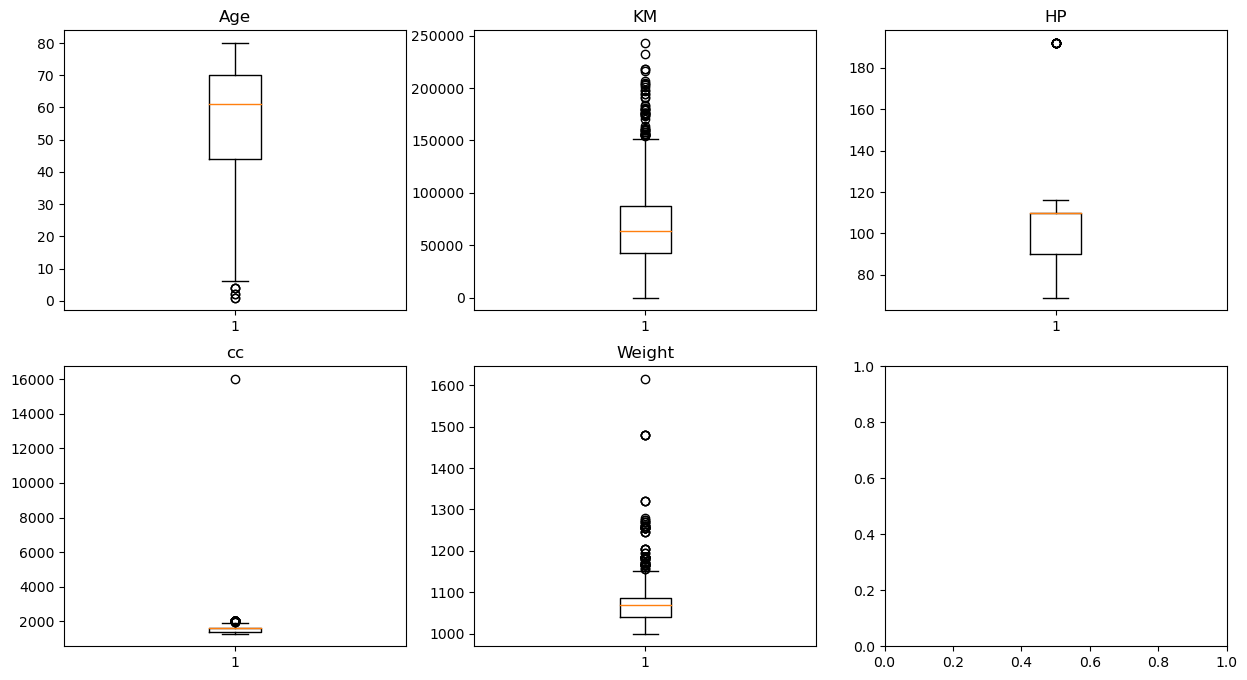

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=3,  figsize=(15,8))
axs = axs.flatten()
age_box = axs[0].boxplot(toyo['Age'])
axs[0].set_title("Age")
km_box = axs[1].boxplot(toyo['KM'])
axs[1].set_title("KM")
hp_box = axs[2].boxplot(toyo['HP'])
axs[2].set_title("HP")
cc_box = axs[3].boxplot(toyo['cc'])
axs[3].set_title("cc")
weight_box = axs[4].boxplot(toyo['Weight'])
axs[4].set_title("Weight")

In [56]:
#Creating a dictionary containing outliers of all the features
outlier_dict = {'Age_outliers':age_box['fliers'][0].get_ydata().tolist(),
 'KM_outliers':km_box['fliers'][0].get_ydata().tolist(),
 'HP_outliers':hp_box['fliers'][0].get_ydata().tolist(),
 'cc_outliers':cc_box['fliers'][0].get_ydata().tolist(),
 'Weight_outliers':weight_box['fliers'][0].get_ydata().tolist()}

In [57]:
outlier_dict

{'Age_outliers': [4, 4, 4, 2, 2, 1, 1],
 'KM_outliers': [243000,
  180638,
  179860,
  178858,
  161000,
  158320,
  216000,
  198167,
  176000,
  174139,
  174000,
  205000,
  204250,
  194545,
  190900,
  183500,
  176184,
  174833,
  155720,
  155500,
  154783,
  154462,
  232940,
  218118,
  217764,
  207114,
  203254,
  200732,
  197501,
  194765,
  191620,
  183277,
  180378,
  178800,
  176177,
  176000,
  172980,
  170000,
  164000,
  161775,
  160000,
  159968,
  159908,
  158492,
  156204,
  156169,
  155210,
  155000,
  154900],
 'HP_outliers': [192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192],
 'cc_outliers': [2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  16000,
  2000,
  2000,
  2000,
  1995,
  1995,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  200

In [58]:
#Relacing the lower outliers of the 'Age' feature with minimum cap value of Age '6'
age_min_cap = age_box['caps'][0].get_ydata()[0]

toyo['Age'] = toyo['Age'].replace(outlier_dict['Age_outliers'], age_min_cap)

toyo[toyo['Age']<=age_min_cap]


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,6,1,1,116,0,2000,5,4,5,1480
110,31000,6,4000,1,116,0,2000,5,4,5,1480
111,31275,6,1500,1,116,0,2000,5,4,5,1480
179,22500,6,3000,2,110,0,1600,5,4,5,1130
182,21125,6,225,2,97,0,1400,5,4,5,1110
183,21500,6,15,2,110,0,1600,5,4,5,1130
184,17795,6,1,2,98,0,1400,4,4,5,1100
185,18245,6,1,2,110,0,1600,5,4,5,1075


In [59]:
#Checking the number of outliers in the "KM" feature
len(outlier_dict['KM_outliers'])

49

In [60]:
#Replacing the upper outliers of 'KM' feature with the upper cap value '151300'
km_max_cap = km_box['caps'][1].get_ydata()[0]

toyo['KM'] = toyo['KM'].replace(outlier_dict['KM_outliers'], km_max_cap)

toyo[toyo['KM']>=km_max_cap]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
186,6950,43,151300,1,69,0,1900,3,4,5,1110
187,9500,38,151300,1,90,0,2000,4,4,5,1160
188,11950,40,151300,1,90,0,2000,5,4,5,1205
189,7750,43,151300,0,110,0,1600,3,4,5,1084
190,11950,40,151300,1,69,0,1900,3,4,5,1105
191,4350,44,151300,1,69,0,1800,5,4,5,1110
378,6500,53,151300,1,69,0,1900,3,4,5,1110
379,6400,51,151300,1,69,0,1900,4,4,5,1095
380,7000,53,151300,1,69,0,1900,3,4,5,1105
381,7750,54,151300,1,72,0,2000,4,4,5,1100


In [61]:
#Replacing the upper outliers of 'HP' with the maximum cap value '116'
hp_max_cap = hp_box['caps'][1].get_ydata()[0]

toyo['HP'] = toyo['HP'].replace(outlier_dict['HP_outliers'], hp_max_cap)

toyo[toyo['HP']>=hp_max_cap]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,2,116,0,1800,3,4,5,1185
10,20950,25,31461,2,116,0,1800,3,4,6,1185
11,19950,22,43610,2,116,0,1800,3,4,6,1185
12,19600,25,32189,2,116,0,1800,3,4,6,1185
13,21500,31,23000,2,116,0,1800,3,4,6,1185
14,22500,32,34131,2,116,0,1800,3,4,6,1185
15,22000,28,18739,2,116,0,1800,3,4,6,1185
16,22750,30,34000,2,116,0,1800,3,4,5,1185
49,21950,31,64982,2,116,0,1800,5,4,6,1195
53,21950,27,49866,2,116,0,1800,5,4,5,1195


In [62]:
#Replacing the upper outliers of 'cc' feature with the upper cap value '1900'
cc_max_cap = cc_box['caps'][1].get_ydata()[0]

toyo['cc'] = toyo['cc'].replace(outlier_dict['cc_outliers'], cc_max_cap)

toyo[toyo['cc']>=cc_max_cap]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,1900,3,4,5,1165
1,13750,23,72937,1,90,0,1900,3,4,5,1165
2,13950,24,41711,1,90,0,1900,3,4,5,1165
3,14950,26,48000,1,90,0,1900,3,4,5,1165
4,13750,30,38500,1,90,0,1900,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1195,8750,74,89800,1,72,0,1900,3,4,5,1115
1202,6950,73,88186,1,72,0,1900,3,4,5,1115
1216,8500,70,85864,1,72,0,1900,5,4,5,1135
1320,9400,69,67092,1,72,0,1900,3,4,5,1115


In [63]:
#Replacing the upper outliers of 'Weight' feature with the upper cap value '1150'
weight_max_cap = weight_box['caps'][1].get_ydata()[0]

toyo['Weight'] = toyo['Weight'].replace(outlier_dict['Weight_outliers'], weight_max_cap)

toyo[toyo['Weight']>=weight_max_cap]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,1900,3,4,5,1150
1,13750,23,72937,1,90,0,1900,3,4,5,1150
2,13950,24,41711,1,90,0,1900,3,4,5,1150
3,14950,26,48000,1,90,0,1900,3,4,5,1150
4,13750,30,38500,1,90,0,1900,3,4,5,1150
...,...,...,...,...,...,...,...,...,...,...,...
960,9390,66,50806,2,86,0,1300,3,4,5,1150
1044,5900,73,151300,1,72,0,1900,5,4,5,1150
1045,6950,79,151300,1,72,0,1900,5,4,5,1150
1052,6950,76,151300,1,72,0,1900,5,4,5,1150


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

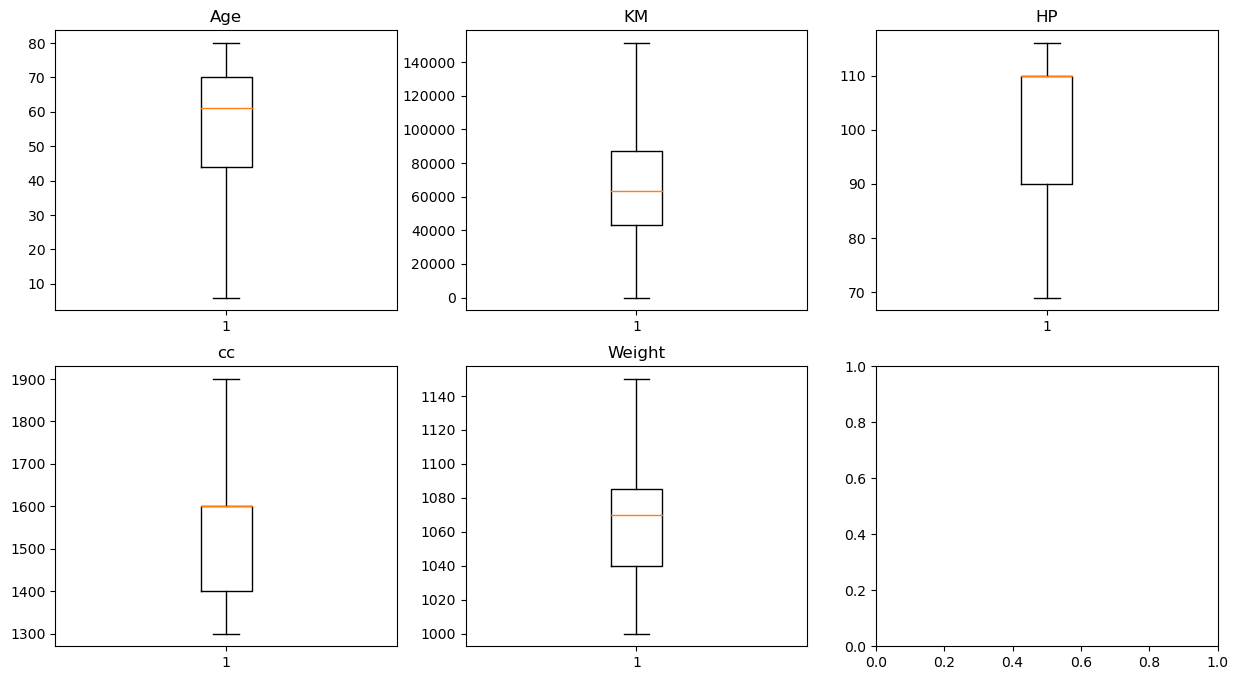

In [64]:
#Box plots of features after treating the outliers
fig, axs2 = plt.subplots(nrows=2, ncols=3,  figsize=(15,8))
axs2 = axs2.flatten()
age_box = axs2[0].boxplot(toyo['Age'])
axs2[0].set_title("Age")
km_box = axs2[1].boxplot(toyo['KM'])
axs2[1].set_title("KM")
hp_box = axs2[2].boxplot(toyo['HP'])
axs2[2].set_title("HP")
cc_box = axs2[3].boxplot(toyo['cc'])
axs2[3].set_title("cc")
weight_box = axs2[4].boxplot(toyo['Weight'])
axs2[4].set_title("Weight")

In [65]:
#Dataset after removing outliers
toyo

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,1900,3,4,5,1150
1,13750,23,72937,1,90,0,1900,3,4,5,1150
2,13950,24,41711,1,90,0,1900,3,4,5,1150
3,14950,26,48000,1,90,0,1900,3,4,5,1150
4,13750,30,38500,1,90,0,1900,3,4,5,1150
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [66]:
#Cylinder feature has just one value so we can drop the feature as it cannot explain any variation of the target

print(toyo.Cylinders.value_counts())

toyo = toyo.drop(['Cylinders'], axis=1)

Cylinders
4    1436
Name: count, dtype: int64


In [67]:
#Importing the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

In [68]:
#Performin Min-Max Normalization on the entire dataset
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(toyo.iloc[:,1:])
toyo_column_names = toyo.iloc[:,1:].columns
X = pd.DataFrame(X, columns=toyo_column_names )
X['Price'] = toyo['Price']
X

<IPython.core.display.Javascript object>

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Price
0,0.229730,0.310544,0.5,0.446809,0.0,1.0,0.333333,0.666667,1.000000,13500
1,0.229730,0.482065,0.5,0.446809,0.0,1.0,0.333333,0.666667,1.000000,13750
2,0.243243,0.275679,0.5,0.446809,0.0,1.0,0.333333,0.666667,1.000000,13950
3,0.270270,0.317246,0.5,0.446809,0.0,1.0,0.333333,0.666667,1.000000,14950
4,0.324324,0.254456,0.5,0.446809,0.0,1.0,0.333333,0.666667,1.000000,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.851351,0.135778,1.0,0.361702,0.0,0.0,0.333333,0.666667,0.166667,7500
1432,0.891892,0.125573,1.0,0.361702,0.0,0.0,0.333333,0.666667,0.100000,10845
1433,0.878378,0.112459,1.0,0.361702,0.0,0.0,0.333333,0.666667,0.100000,8500
1434,0.864865,0.111798,1.0,0.361702,0.0,0.0,0.333333,0.666667,0.100000,7250


In [69]:
#Imports
from statsmodels.formula import api as smf
from statsmodels import api as sma
from scipy.stats import skew


In [70]:
#performing train-test split
train_80_pct = X.sample(n=1148, random_state=42)

In [72]:
model1 = smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight', data=train_80_pct).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     657.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:06:57   Log-Likelihood:                -9998.9
No. Observations:                1148   AIC:                         2.002e+04
Df Residuals:                    1138   BIC:                         2.007e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.405e+04    639.199     21.979      0.000    1.28e+04    1.53e+04
Age        -9213.4773    263.782    -34.928      0.000   -9731.031   -8695.924
KM         -2834.3571    274.731    -10.317      0.000   -3373.393   -2295.321
Fuel_Type    127.9408    393.833      0.325      0.745    -644.780     900.662
HP          1374.4864    218.689      6.285      0.000     945.407    1803.565
Automatic     74.4412    199.363      0.373      0.709    -316.719     465.602
cc         -1257.6659    292.568     -4.299      0.000   -1831.699    -683.633
Doors       -347.8674    164.333     -2.117      0.034    -670.297     -25.438
Gears       2670.0951    778.719      3.429      0.001    1142.209    4197.982
Weight      4585.8295    366.446     12.514      0.000    3866.844    5304.815
==============================================================================
Omnibus:                      437.035   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5635.459
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                      13.495   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

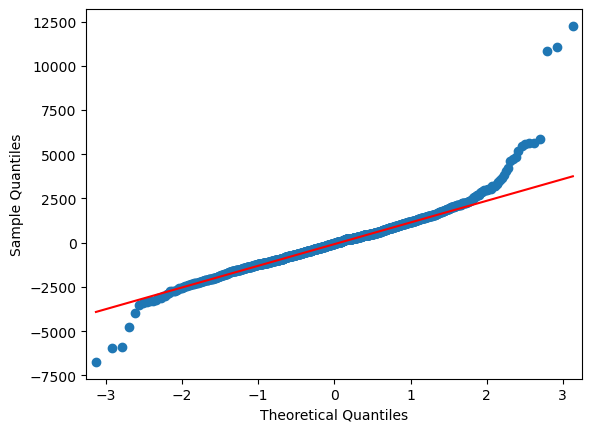

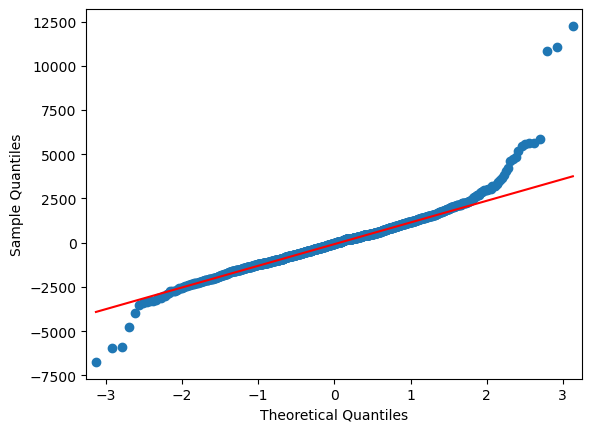

In [73]:
#Checking the normality of the residuals of the model1
sma.qqplot(model1.resid, line='q')

<IPython.core.display.Javascript object>

1.3843110080034824

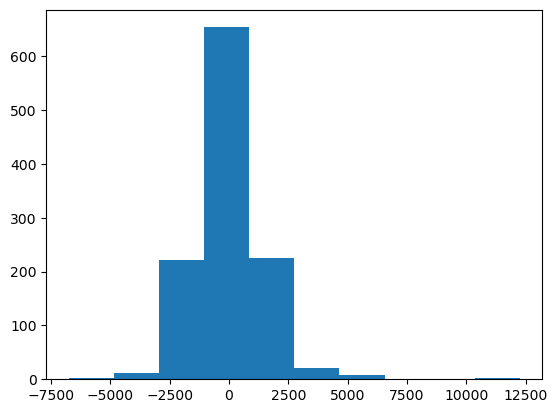

In [74]:
#Plotting the histogram of residuals of model 1
plt.hist(model1.resid)
skew(model1.resid)

In [75]:
#Creating a 2nd model without 'Automatic' and 'Fuel_Type' feature
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Weight', data=train_80_pct).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     846.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:09:39   Log-Likelihood:                -9999.0
No. Observations:                1148   AIC:                         2.001e+04
Df Residuals:                    1140   BIC:                         2.005e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.416e+04    563.791     25.115      0.000    1.31e+04    1.53e+04
Age        -9182.5100    255.071    -36.000      0.000   -9682.972   -8682.048
KM         -2862.7180    267.858    -10.687      0.000   -3388.268   -2337.168
HP          1418.6098    184.770      7.678      0.000    1056.082    1781.138
cc         -1320.5909    261.266     -5.055      0.000   -1833.208    -807.974
Doors       -354.5726    160.194     -2.213      0.027    -668.880     -40.265
Gears       2663.6127    764.408      3.485      0.001    1163.809    4163.417
Weight      4609.9657    340.805     13.527      0.000    3941.290    5278.641
==============================================================================
Omnibus:                      430.905   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5482.296
Skew:                           1.363   Prob(JB):                         0.00
Kurtosis:                      13.353   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

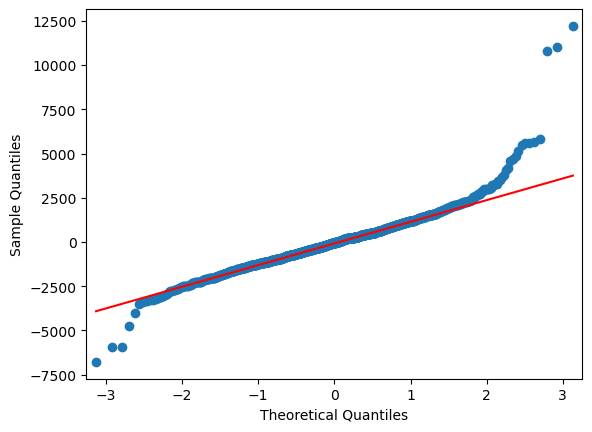

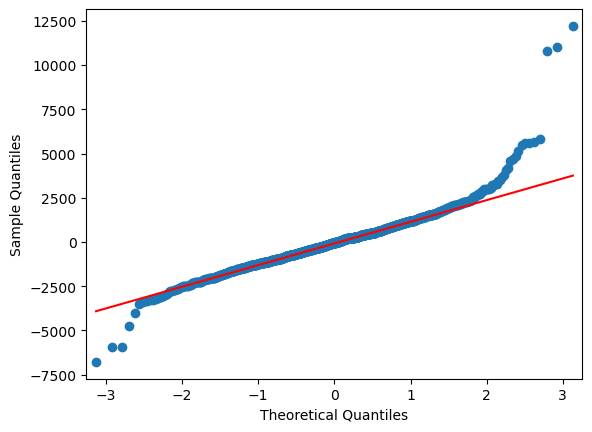

In [76]:
#Checking the normality of the residuals of the model2
sma.qqplot(model2.resid, line='q')

<IPython.core.display.Javascript object>

1.3630728298769748

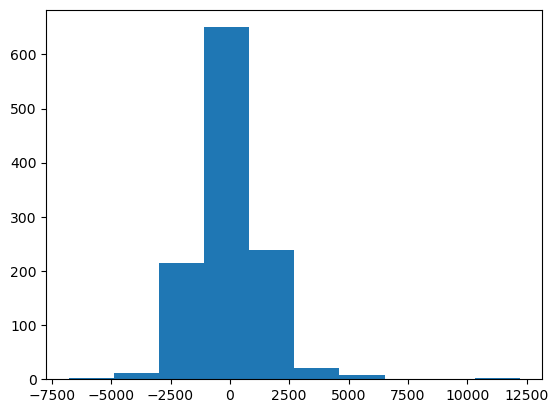

In [77]:
#Plotting the histogram of residuals of model 2

plt.hist(model2.resid)
skew(model2.resid)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

design_matrix = dmatrix(model1.model.data.design_info, toyo)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = design_matrix.design_info.column_names
vif_data['VIF'] = [variance_inflation_factor(design_matrix, i) for i in range(design_matrix.shape[1])]

print(vif_data)

<IPython.core.display.Javascript object>

     feature          VIF
0  Intercept  3199.814721
1        Age     2.234641
2         KM     2.030514
3  Fuel_Type     2.921183
4         HP     1.848950
5  Automatic     1.134497
6         cc     3.573495
7      Doors     1.417056
8      Gears     1.090277
9     Weight     4.311390


In [93]:
#Checking coorelation between the features
X.corr()

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Price
Age,1.000000,0.533007,0.080176,-0.112659,0.031578,-0.139695,-0.148015,-0.005504,-0.476572,-0.875871
KM,0.533007,1.000000,-0.393248,-0.324958,-0.081808,0.254777,-0.037553,0.020302,-0.001446,-0.588350
Fuel_Type,0.080176,-0.393248,1.000000,0.464426,0.069718,-0.599662,-0.026935,0.069655,-0.530127,-0.022157
HP,-0.112659,-0.324958,0.464426,1.000000,0.026509,0.082001,0.131855,0.098191,-0.004622,0.231775
Automatic,0.031578,-0.081808,0.069718,0.026509,1.000000,-0.059519,-0.027654,-0.098555,0.089593,0.033081
cc,-0.139695,0.254777,-0.599662,0.082001,-0.059519,1.000000,0.139616,0.051949,0.718511,0.172804
Doors,-0.148015,-0.037553,-0.026935,0.131855,-0.027654,0.139616,1.000000,-0.160141,0.384294,0.185326
Gears,-0.005504,0.020302,0.069655,0.098191,-0.098555,0.051949,-0.160141,1.000000,0.018753,0.063104
Weight,-0.476572,-0.001446,-0.530127,-0.004622,0.089593,0.718511,0.384294,0.018753,1.000000,0.534337
Price,-0.875871,-0.588350,-0.022157,0.231775,0.033081,0.172804,0.185326,0.063104,0.534337,1.000000


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
#performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:9] , X['Price'], test_size=0.2, random_state=42 )

In [82]:
X_train.shape

(1148, 9)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train )

<IPython.core.display.Javascript object>

LinearRegression()

In [88]:
y_pred = lin_reg.predict(X_test)

In [91]:
#r-squared score 
r2_score(y_test, y_pred)

0.8260193210712643

In [92]:
#RMSE of the predictions
np.sqrt(mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

1523.610009756432

In [104]:
#Performing the regression again by dropping the 'Automatic' and 'Fuel_Type' Column as its p-value was very high
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[0,1,3,5,6,7,8]] , toyo['Price'], test_size=0.2, random_state=42 )

In [105]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train )

<IPython.core.display.Javascript object>

LinearRegression()

In [106]:
y_pred = lin_reg2.predict(X_test)

In [107]:
#The variability metric has improved by 2 percentage point
r2_score(y_test, y_pred)

0.8281011769399351

In [108]:
#The RMSE is down by 7 units
np.sqrt(mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

1514.4668033903213

### Applying Lasso Regression


In [109]:
from sklearn.linear_model import Lasso

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:9] , X['Price'], test_size=0.2, random_state=42 )

In [136]:
#Applying Lasso regression on our training data with all features remaining after EDA

l1 = Lasso(alpha=2)
l1.fit(X_train, y_train)
y_pred = l1.predict(X_test)

In [137]:
#New coefficients of the features
#We can see that the coefficient of the 5th feature 'Automatic' is made '0'
pd.DataFrame(l1.coef_, index=X.drop('Price', axis=1).columns, columns=['Coef'])

<IPython.core.display.Javascript object>

,Coef
Age,-8994.040254
KM,-2974.981783
Fuel_Type,643.135832
HP,1239.144937
Automatic,0.000000
cc,-1123.864578
Doors,-325.937225
Gears,1841.034016
Weight,4697.863402


### previous coefficients of the same features
### 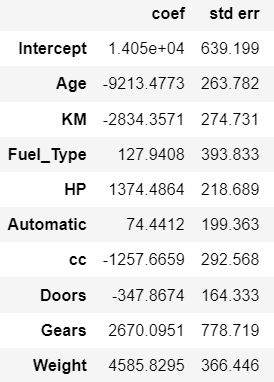


In [139]:
#R-squared of Lasso regression on all features
r2_score(y_test, y_pred)

0.8258275067952905

In [140]:
#RMSE of Lasso regression on all features
np.sqrt(mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

1524.4496709342425

In [141]:
#Performing the regression again by dropping the 'Automatic' and 'Fuel_Type' Column as its p-value was very high
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[0,1,3,5,6,7,8]] , toyo['Price'], test_size=0.2, random_state=42 )

In [142]:
#Applying Lasso regression by dropping 'Automatic' and 'Fuel_Type' column
l1 = Lasso(alpha=2)
l1.fit(X_train, y_train)
y_pred = l1.predict(X_test)
feature_names = list(set(X.columns) - {'Fuel_Type', 'Automatic', 'Price'})
pd.DataFrame(l1.coef_, index=feature_names, columns=['Coef'])

<IPython.core.display.Javascript object>

,Coef
HP,-8953.065761
Gears,-3092.034422
Weight,1416.377693
cc,-1301.787158
KM,-294.533793
Doors,1980.976969
Age,4587.656263


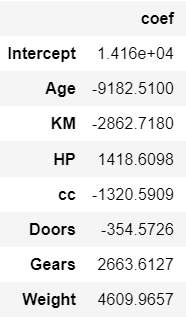

In [143]:
r2_score(y_test, y_pred)

0.8277511741883933

In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

1516.0078203557646

#### Applying Lasso Regression didnt made any improvements for this dataset. This means the Linear model was good and not overfitted earlier

## Ridge Regression

In [134]:
from sklearn.linear_model import Ridge

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:9] , X['Price'], test_size=0.2, random_state=42 )

In [146]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8254121801919231


<IPython.core.display.Javascript object>

RMSE:  1526.2661676068903


In [147]:
#Performing the regression again by dropping the 'Automatic' and 'Fuel_Type' Column as its p-value was very high
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[0,1,3,5,6,7,8]] , toyo['Price'], test_size=0.2, random_state=42 )

In [148]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8273597657347573


<IPython.core.display.Javascript object>

RMSE:  1517.7292880248244


#### Applying Ridge Regression didnt made any improvements for this dataset. This means the Linear model was good and not overfitted